## Reading Dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv('wine_dataset.csv')

In [3]:
df.head()

,index,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,type,volatile acidity,price,cost,sold
0,1,-1.250764,0.512826,2.349104,2.035356,3.382119,-1.156395,0.195906,-0.681666,0.260284,-1.216248,white,1.459786,44.24,13.70,9775
1,2,0.677615,1.397691,-0.678741,2.102052,2.225099,-1.100055,1.315398,-0.429449,0.730695,-0.526249,white,3.616052,37.67,5.84,4681
2,3,0.342245,2.311099,-2.192664,0.021131,0.296732,-1.438095,1.750756,-0.702685,-0.882144,-1.888554,white,7.533774,53.34,11.67,8386
3,4,0.426087,0.798266,-2.055034,1.408412,0.836674,-1.381755,1.626368,-0.429449,-0.277330,-1.853169,white,4.132341,51.18,14.02,8676
4,5,0.174560,1.169338,-2.192664,0.634736,0.142462,-1.438095,2.559278,-0.250795,0.058679,-1.800093,white,5.134549,43.43,13.43,9924


In [4]:
df.describe()

,index,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity,price,cost,sold
count,6497.000000,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6497.000000,6497.000000,6497.000000
mean,3249.000000,-3.129882e-15,-9.268662e-17,-7.000711e-16,-2.636818e-15,-1.734115e-16,4.812711e-16,-4.842124e-16,-8.358542e-16,6.395103e-16,-3.865531e-16,-8.079662e-16,31.164390,1.243143,1358.572110
std,1875.666681,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,10.107653,2.116336,1874.375193
min,1.000000,-2.089189e+00,-1.342536e+00,-2.192664e+00,-2.529997e+00,-2.634386e+00,-1.663455e+00,-3.100376e+00,-1.017956e+00,-2.091774e+00,-1.941631e+00,-1.577208e+00,0.180000,-3.560000,97.000000
25%,1625.000000,-8.315512e-01,-5.147590e-01,-4.722972e-01,-7.858922e-01,-6.288845e-01,-7.620156e-01,-6.748102e-01,-7.657389e-01,-6.805395e-01,-6.854795e-01,-6.661100e-01,24.430000,0.000000,128.000000
50%,3249.000000,-1.608107e-01,-2.578628e-01,-5.940918e-02,6.448391e-02,-1.660764e-01,-8.593639e-02,-5.287017e-02,-5.135217e-01,-1.429263e-01,3.990360e-02,-3.016707e-01,31.120000,0.890000,963.000000
75%,4873.000000,6.776148e-01,2.559297e-01,4.911081e-01,7.647937e-01,3.738663e-01,5.901428e-01,6.312639e-01,5.584015e-01,4.618885e-01,7.122099e-01,3.664680e-01,37.870000,1.920000,1766.000000
max,6497.000000,3.695947e+00,1.584097e+01,9.230570e+00,1.476765e+01,6.698910e+00,1.456245e+01,4.922650e+00,1.268585e+01,9.870119e+00,5.736815e+00,7.533774e+00,72.620000,18.250000,27564.000000


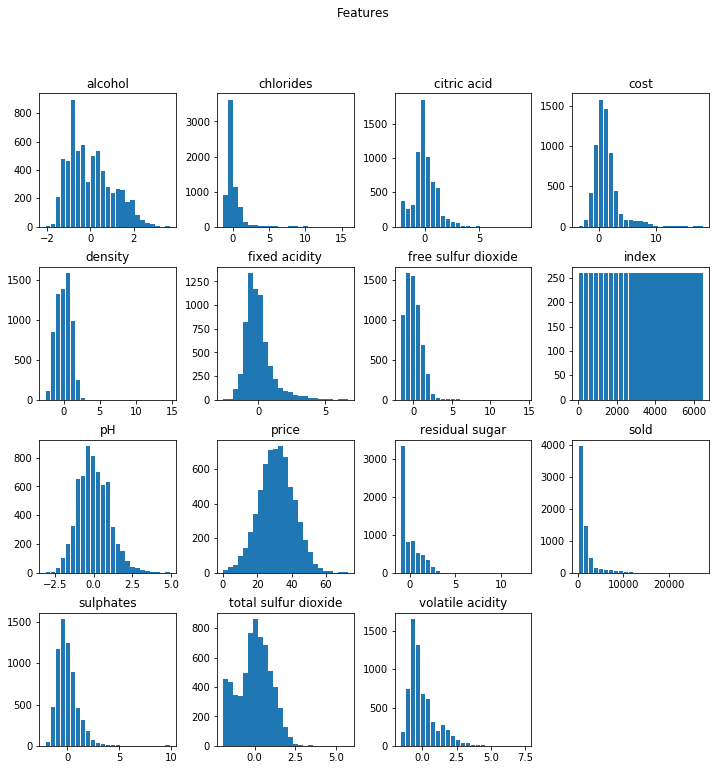

In [5]:
ax = df.hist(bins=25, grid=False, figsize=(12,12), zorder=2, rwidth=0.9)
plt.suptitle("Features")
plt.show()

In [6]:
df.type.value_counts(dropna=False)

red      4898
white    1599
Name: type, dtype: int64

## Pre Processing

In [7]:
df.drop("index",axis='columns',inplace=True)
df.shape

(6497, 15)

In [8]:
df = df[df.cost > 0]
df = df[df.price > 0]
df.shape

(4860, 15)

In [9]:
df['red'] = [1 if x == 'red' else 0 for x in df.type]
df['white'] = [1 if x == 'white' else 0 for x in df.type]

In [10]:
df.drop("type",axis='columns',inplace=True)
df.shape

(4860, 16)

In [11]:
#df['profit'] = df['price'] - df['cost']
#df['margin'] = [(x - y)/y if y != 0 else 0 for x,y in zip(df.price,df.cost)]

## Analysis

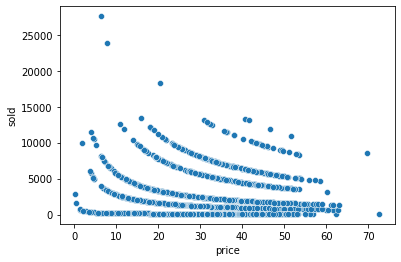

In [12]:
ax = sns.scatterplot(data= df, x = "price", y="sold")

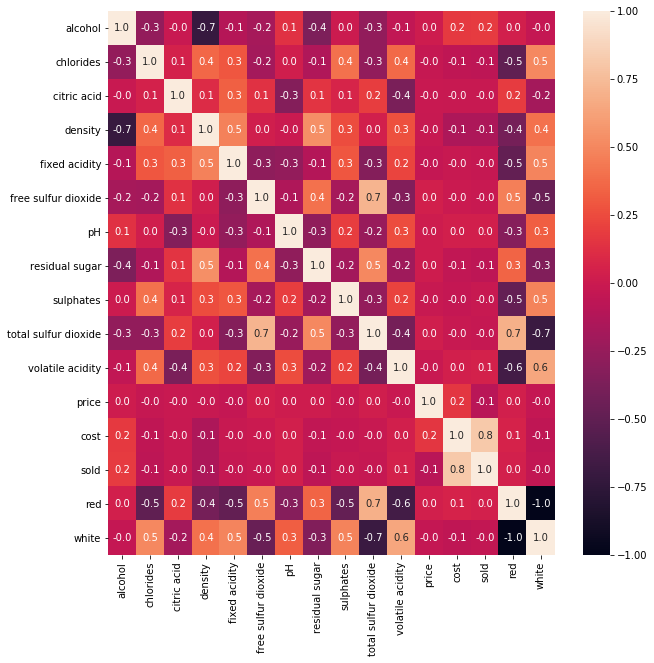

In [13]:
plt.figure(figsize=(10,10))
corr = sns.heatmap(df.corr(),annot=True,fmt = ".1f")

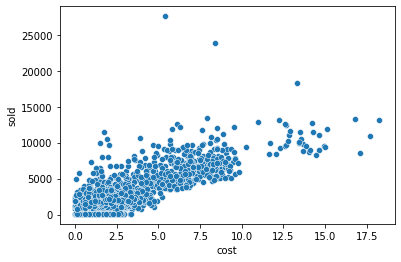

In [14]:
ax = sns.scatterplot(data= df, x = "cost", y="sold")

## Normalization

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

features = [c for c in df.columns if c not in ['sold']]
scaler = MinMaxScaler()
preprocess = make_column_transformer(
    (scaler, features),
    remainder='passthrough'
)

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['sold']),df['sold'], test_size=0.3,random_state=42)
print("Shape of Train Dataset: ",X_train.shape)
print("Shape of Test Dataset: ",X_test.shape)

Shape of Train Dataset:  (3402, 15)
Shape of Test Dataset:  (1458, 15)


## Model Selection

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import ensemble

models = [
    LinearRegression(),
    ensemble.GradientBoostingRegressor(),
    ensemble.AdaBoostRegressor(),
    ensemble.BaggingRegressor(),
    ensemble.ExtraTreesRegressor()   
]

### Pipeline 

In [18]:
from sklearn.pipeline import Pipeline

for model in models:
    steps = [
        ('preprocess', preprocess),
        ('model', model)
    ]
    pipeline = Pipeline(steps)
    pipeline.fit(X_train, y_train)   
    print(model)
    print("Score: %.3f" % pipeline.score(X_test, y_test))

LinearRegression()
Score: 0.702
GradientBoostingRegressor()
Score: 0.788
AdaBoostRegressor()
Score: 0.543
BaggingRegressor()
Score: 0.777
ExtraTreesRegressor()
Score: 0.801


### Hyperparameters

In [31]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'model__max_depth': np.arange(3,10,1),
    'model__n_estimators': np.arange(50,250,50)
}
rand_param = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, n_iter=5, cv=5, verbose=False)
rand_param.fit(X_train, y_train)
rand_param.best_params_

{'model__n_estimators': 150, 'model__max_depth': 9}

### Gradient Booster

In [19]:
from sklearn import ensemble
gbr = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
gbr.fit(X_train, y_train)
gbr.score(X_test,y_test)

0.7849307142870626

### Linear Regression w 1 feature (Cost)

In [20]:
x1_train, x1_test, y_train, y_test = train_test_split(df['cost'],df['sold'], test_size=0.3,random_state=42)
print("Shape of Train Dataset: ",x1_train.shape)
print("Shape of Test Dataset: ",x1_test.shape)

Shape of x1 Train Dataset:  (3402,)
Shape of Y Train Dataset:  (3402,)
Shape of x1 Test Dataset:  (1458,)
Shape of Y Test Dataset:  (1458,)


In [21]:
x1_train = x1_train[:,np.newaxis]
x1_test = x1_test[:,np.newaxis]
reg.fit(x1_train,y_train)
reg.score(x1_test,y_test)

NameError: name 'reg' is not defined